Exercise 1   How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import nsfg
import thinkstats2

In [3]:
preg = nsfg.ReadFemPreg()

In [4]:
live = preg[preg.outcome==1]

In [5]:
my_weight = 6 + 2/16
weights = live.totalwgt_lb

Text(0, 0.5, 'Frequency')

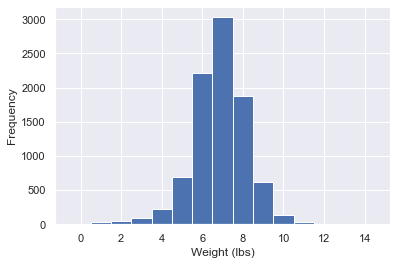

In [6]:
plt.hist(weights,bins=range(0,16,1),align='left')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')

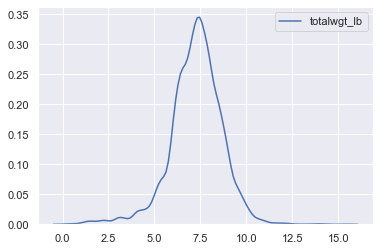

In [7]:
sns.kdeplot(weights)

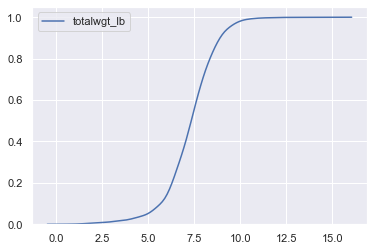

In [8]:
sns.kdeplot(weights,cumulative=True)

In [9]:
from scipy import stats

In [10]:
# my percentile in birth weight overall
stats.percentileofscore(weights,my_weight)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2017: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2018: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)


15.784871010056843

In [11]:
firsts = live[live.birthord==1]
others = live[live.birthord!=1]

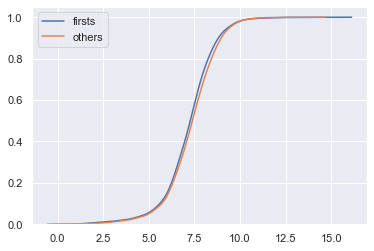

In [12]:
sns.kdeplot(firsts.totalwgt_lb,cumulative=True,label='firsts')
sns.kdeplot(others.totalwgt_lb,cumulative=True,label='others')

In [13]:
# my percentile in birth weight for first borns
stats.percentileofscore(firsts.totalwgt_lb,my_weight)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2017: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2018: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)


16.519374575118967

Exercise 2   The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform? 

In [14]:
numbers = np.random.random(1000)

(array([ 98.,  96.,  95.,  97.,  97.,  95., 119.,  97.,  95., 111.]),
 array([5.12025248e-05, 1.00023284e-01, 1.99995366e-01, 2.99967447e-01,
        3.99939529e-01, 4.99911610e-01, 5.99883692e-01, 6.99855773e-01,
        7.99827854e-01, 8.99799936e-01, 9.99772017e-01]),
 <a list of 10 Patch objects>)

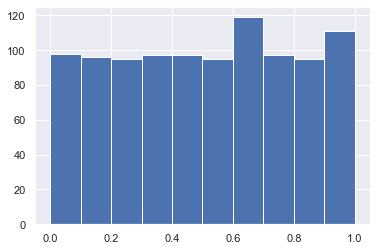

In [15]:
plt.hist(numbers)

(0.0, 1.0)

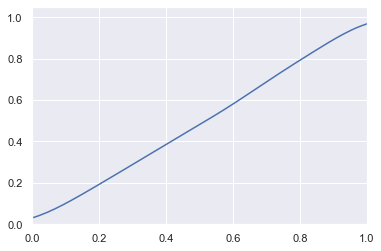

In [16]:
sns.kdeplot(numbers,cumulative=True)
plt.xlim(0,1)

The random set of 1000 numbers is sometimes close to uniform distribution, and other times not so much.  Naturally, when I increase the sample to 10000 numbers, it is very close to uniform each time.

(array([ 976.,  995.,  958., 1023., 1059.,  997.,  968., 1013.,  973.,
        1038.]),
 array([4.09279153e-04, 1.00355727e-01, 2.00302174e-01, 3.00248622e-01,
        4.00195069e-01, 5.00141517e-01, 6.00087964e-01, 7.00034412e-01,
        7.99980859e-01, 8.99927307e-01, 9.99873754e-01]),
 <a list of 10 Patch objects>)

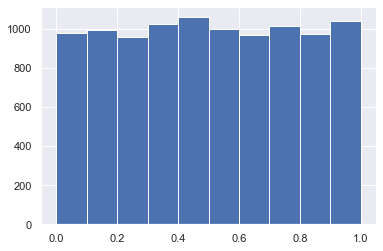

In [17]:
more_numbers = np.random.random(10000)
plt.hist(more_numbers)

In [18]:
same_length = live[live.prglngth==37].totalwgt_lb
stats.percentileofscore(same_length,my_weight)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2017: RuntimeWarning: invalid value encountered in less
  left = np.count_nonzero(a < score)
/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2018: RuntimeWarning: invalid value encountered in less_equal
  right = np.count_nonzero(a <= score)


22.52747252747253